# Part 2 - Exploratory Data Analaysis (EDA)

In this notebook, we will explore the data a little bit. Create some plots, and see if we could garner any interesting insights. 

In [1]:
#importing the holy trinity of data science packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Other visualization packages
import seaborn as sns


In [2]:
df = pd.read_csv('data/cleaned_data.csv', index_col = 0)

display(df.head(7))
print(df.shape)

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,Bachelor's Degree,Marketing and Advertising,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
3,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,Head of Content (m/f),"DE, BE, Berlin",Your Responsibilities: Manage the English-spea...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",Who is Airenvy?Hey there! We are seasoned entr...,0,1,1,Full-time,Associate,High School or equivalent,Information Technology and Services,Customer Service,0


(14836, 12)


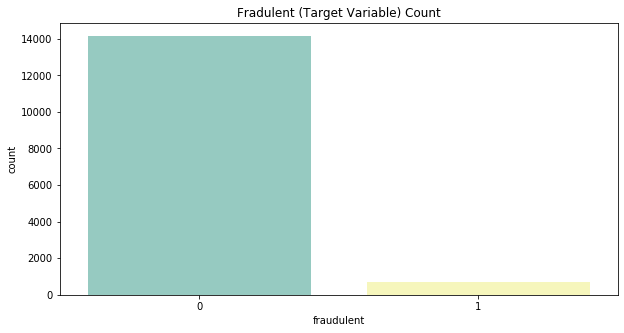

In [3]:
#Ploting the Target variable
plt.figure(figsize = (10,5))
sns.countplot(x = df.fraudulent, data = df,palette="Set3")
plt.title('Fradulent (Target Variable) Count')
plt.show()

It is clear that our data is highly imbalanced. This may cause some difficulties when modeling with highly imbalanced data. 

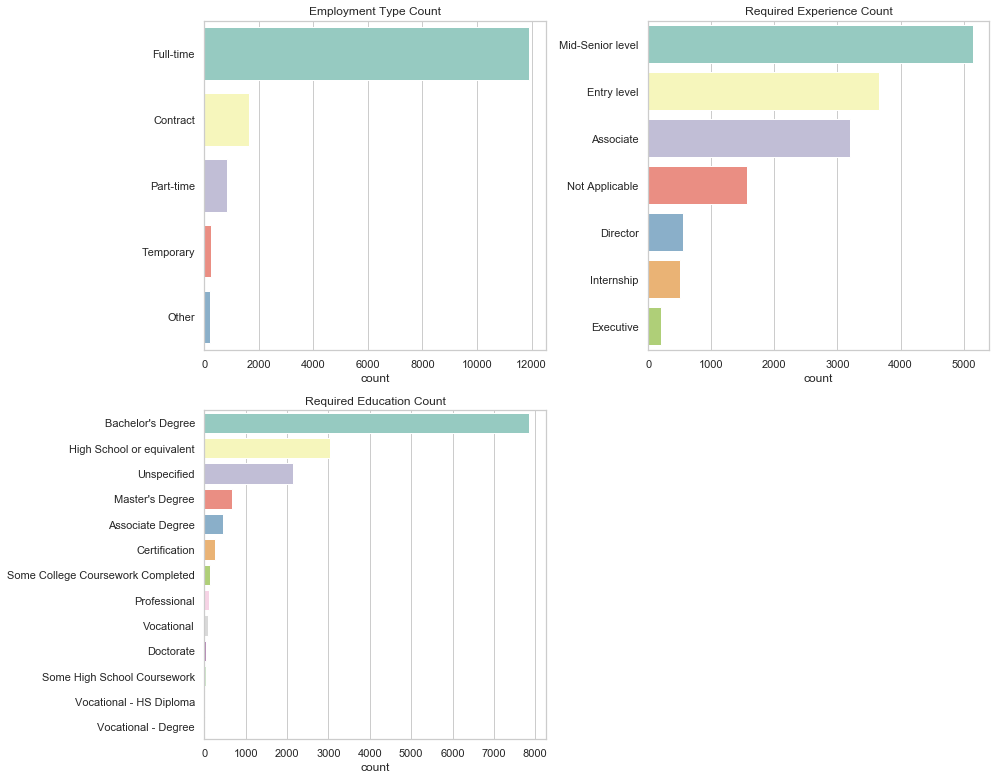

In [4]:
#Stylistic Set
sns.set(style="whitegrid")

plt.figure(figsize = (14,11))

#fig 1
plt.subplot(2,2,1)
sns.countplot(y = df.employment_type, data = df,palette="Set3", 
              order = df.employment_type.value_counts().index)
plt.title("Employment Type Count")
plt.ylabel("")

#fig2
plt.subplot(2,2,2)
#matplotlib version
#df.required_experience.value_counts().plot(kind='barh')
#sns version
sns.countplot(y = df.required_experience, data = df,palette="Set3",
             order = df.required_experience.value_counts().index)
plt.title("Required Experience Count")
plt.ylabel("")

#fig 3
plt.subplot(2,2,3)
sns.countplot(y = df.required_education, data = df,palette="Set3",
             order = df.required_education.value_counts().index)
plt.title("Required Education Count")
plt.ylabel("")

plt.tight_layout()
plt.show()

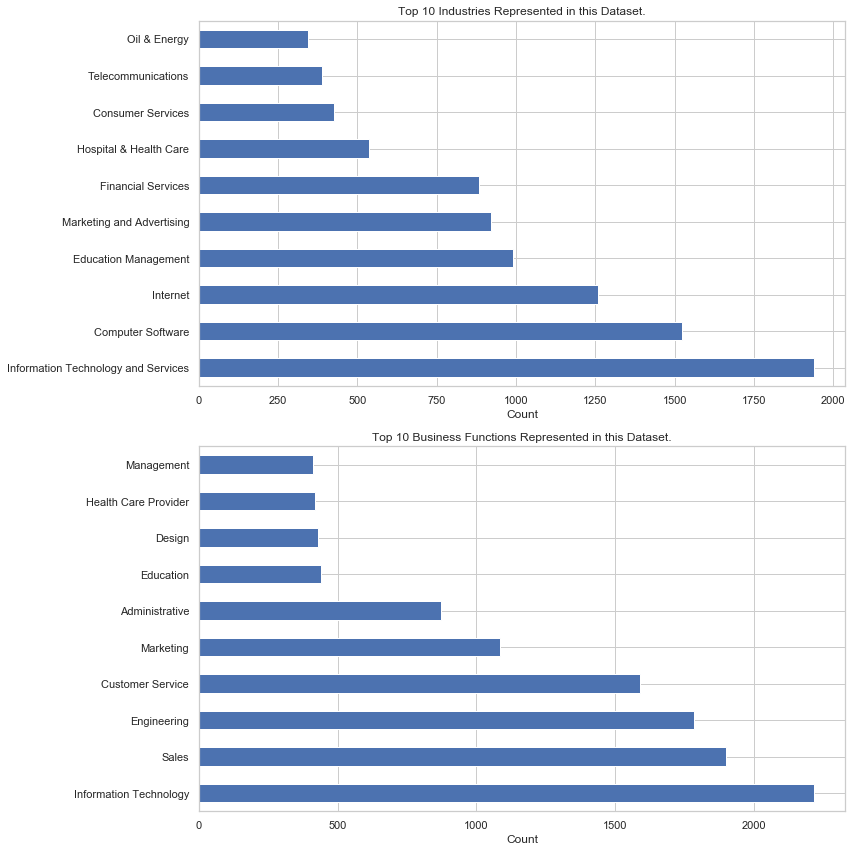

In [5]:
industry = df.industry.value_counts()[:10]
function = df.function.value_counts()[:10]

plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
industry.plot(kind = 'barh')
plt.title('Top 10 Industries Represented in this Dataset.')
plt.xlabel('Count')

plt.subplot(2,1,2)
function.plot(kind = 'barh')
plt.title('Top 10 Business Functions Represented in this Dataset.')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

### EDA Insights

* Most job offers were Full-time, followed by Contract work.

* Most jobs required an experience of mid-senior level, followed closely by Entry Level and Associate Level. Which is similar. 

* Most education experience required is a Bachelor’s Degree, with very few requiring Master’s Degree. Which signals that **work experience matters more** than education experience, and that the bachelor degree is a piece paper that proves you’ve done something. 

* In this dataset, The top 3 Industries were all tech related.

* The top 3 business functions were Information Technology, Sales, and Engineering.


#### Future Plots
1. A couple of word cloud images, people for some reason love world clouds.
2. Plot of a map, showing the counts of jobs for each country. etc.

## Feature Engineering & Modeling

We need to do some feature engineering. I would like to one hot encode my categorical data, as well as fit a TFIDF Vectorizer to my text data column. Might do a Count Vectorizer as well, and see if that changes anything to my model. In addition, I probably want to fit a PCA to reduce computational time. 

**Next Steps:**

1. One Hot Encode Cateogrical Data
2. Fit in a TFIDF Vectorizer
3. Fit in a Count Vectorizer
4. Determine if using a PCA would help. 

In [6]:
#Make Copy
df_2 = df.copy()

# One Hot Encoding using Pandas get dummies function
columns_to_1_hot = ['employment_type','required_experience','required_education',
                   'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_2[column])
    df_2 = pd.concat([df_2, encoded], axis = 1)


For simplicity sake, I will also drop the *title* & *location* columns

In [7]:
columns_to_1_hot += ['title', 'location']
    
#droping the original columns that we just one hot encoded from
df_2 = df_2.drop(columns_to_1_hot, axis = 1)

In [8]:
df_2.head(3)

,description,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,...,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing
0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Our client, located in Houston, is actively se...",0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Handling the description column 

First of all we need to clean up our text data a little bit. Now let us creat some helper funcitons.

In [9]:
#Importing NLP plugins
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
import string

#Import our TfidFVectorizer plugin
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
def tokenizer(text):
    
    #All characters in this string will be converted to lowercase
    text = text.lower()
    
    #Removing sentence punctuations
    for punctuation_mark in string.punctuation:
        text = text.replace(punctuation_mark,'')
    
    #Creating our list of tokens
    list_of_tokens = text.split(' ')
    #Creating our cleaned tokens list 
    cleaned_tokens = []
    #Intatiating our Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    #Removing Stop Words in our list of tokens and any tokens that happens to be empty strings
    for token in list_of_tokens:
        if (not token in stop_words) and (token != ''):
            #lemmatizing our token
            token_lemmatized = lemmatizer.lemmatize(token)
            #appending our finalized cleaned token
            cleaned_tokens.append(token_lemmatized)
    
    return cleaned_tokens

### Creating our Baseline Model

In [39]:
#Importing our Sklearn Plugins

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#importing our models
from sklearn.linear_model import LogisticRegression

#Model Evaluation
from sklearn.metrics import classification_report

In [12]:
df_3 = df_2.copy()

target = df_3.fraudulent
features = df_3.drop(['fraudulent'], axis = 1)


In [13]:
#Spliting our Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2,
                                                    stratify = target, random_state = 42)

# Model 1: Logistic Regression w/ TfidfVectorizer

Will now be using SkLearn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) function to easily append our generated tfidfvectorizer features to our dataframe.

In [14]:
preprocess = ColumnTransformer([
    ('description_tfidf', TfidfVectorizer(tokenizer = tokenizer, min_df = 0.1, ngram_range=(1,3)), 'description')])

In [15]:
%%time
model_logreg = make_pipeline(preprocess,
                            LogisticRegression())

model_logreg.fit(X_train, y_train)

y_train_pred = model_logreg.predict(X_train)
y_pred = model_logreg.predict(X_test)

CPU times: user 1min 2s, sys: 1.25 s, total: 1min 3s
Wall time: 1min 5s


In [37]:
#Evaluation Plugins
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [21]:
print(accuracy_score(y_test, y_pred))

0.9592318059299192


Pretty Good Accuracy, however, let's compare it to the Null accuracy.
The Null accuracy is accuracy that could be achieve by always predicting the most frequent class.

In [23]:
#null accuracy 
max(y_test.mean(), 1-y_test.mean())

0.954177897574124

In [34]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[2827    5]
 [ 116   20]]


It seems our model has incorectly predicted 5 of our postive models as negative, and incorectly predicted 116 of our negative class as positive. 

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2832
           1       0.80      0.15      0.25       136

    accuracy                           0.96      2968
   macro avg       0.88      0.57      0.61      2968
weighted avg       0.95      0.96      0.95      2968



In [38]:
print(roc_auc_score(y_test, y_pred))

0.572646643403124


Honestly, our model is not great. This is due to our highly imbalanced data. Let's see if we could improve upon this model.

# Model Iteration 2: Logistic Regression with Count Vectorizer

In [40]:
preprocess_cv = ColumnTransformer([
    ('description_cv', CountVectorizer(tokenizer = tokenizer, min_df = 0.1, ngram_range=(1,3)), 'description')])

In [41]:
%%time
model_logreg_cv = make_pipeline(preprocess_cv,
                            LogisticRegression())

model_logreg_cv.fit(X_train, y_train)

y_train_pred_cv = model_logreg_cv.predict(X_train)
y_pred_cv = model_logreg_cv.predict(X_test)

CPU times: user 1min 3s, sys: 3.01 s, total: 1min 6s
Wall time: 1min 15s


In [42]:
print(accuracy_score(y_test, y_pred_cv))

0.9592318059299192


In [43]:
cf_matrix = confusion_matrix(y_test,y_pred_cv)
print(cf_matrix)

[[2819   13]
 [ 108   28]]


In [45]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2832
           1       0.68      0.21      0.32       136

    accuracy                           0.96      2968
   macro avg       0.82      0.60      0.65      2968
weighted avg       0.95      0.96      0.95      2968



In [46]:
print(roc_auc_score(y_test, y_pred_cv))

0.6006459787304752


Suprisingly our Count Vectorizer did a better job overall than our Tfidf model, based our our evaluation metrics. In this case I'm looking at the AUC score. The closer it is to 1 the better the model is at predicting. 

# Model 3: Optimzed Logistic Regression w/ Count Vectorizer



# Model 4: K-NeighborClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

k_range = np.arange(1,31,2)
k_scores

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [58]:
column_trans = make_column_transformer(
    (CountVectorizer(tokenizer = tokenizer, min_df = 0.1, ngram_range=(1,3)), ['description']),
    remainder='passthrough')

In [71]:
features_cv = preprocess_cv.fit_transform(features)

In [72]:
features_cv

<14836x206 sparse matrix of type '<class 'numpy.int64'>'
	with 553879 stored elements in Compressed Sparse Row format>

In [ ]:
%%time
for k in np.arange(1,31,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, features, target, cv = 10, scoring = 'roc_auc')
    k_scores.append(scores.mean())